In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



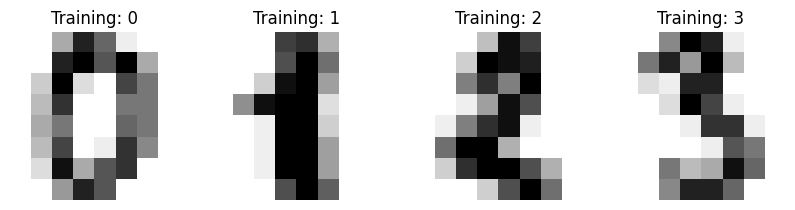

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [9]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

clf = DecisionTreeClassifier(criterion="entropy", max_depth = 50)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_42 <= 8.50
|   |--- feature_43 <= 3.50
|   |   |--- feature_26 <= 9.50
|   |   |   |--- feature_29 <= 13.50
|   |   |   |   |--- feature_19 <= 13.50
|   |   |   |   |   |--- feature_33 <= 2.00
|   |   |   |   |   |   |--- feature_4 <= 8.00
|   |   |   |   |   |   |   |--- feature_22 <= 1.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_22 >  1.00
|   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |--- feature_4 >  8.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_33 >  2.00
|   |   |   |   |   |   |--- feature_36 <= 8.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_36 >  8.00
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_19 >  13.50
|   |   |   |   |   |--- feature_62 <= 13.50
|   |   |   |   |   |   |--- feature_38 <= 1.50
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_38 >  1.50
|   |   |   | 

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



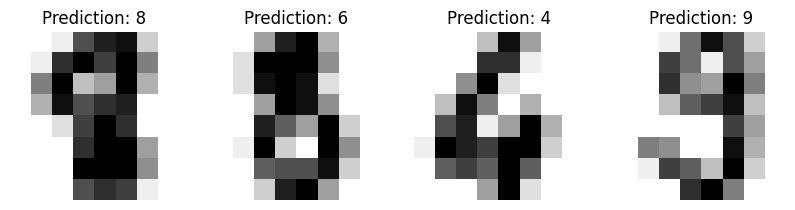

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [11]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(criterion='entropy', max_depth=50):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        88
           1       0.76      0.65      0.70        91
           2       0.88      0.76      0.81        86
           3       0.78      0.81      0.80        91
           4       0.71      0.67      0.69        92
           5       0.74      0.89      0.81        91
           6       0.95      0.95      0.95        91
           7       0.72      0.78      0.75        89
           8       0.81      0.75      0.78        88
           9       0.72      0.77      0.75        92

    accuracy                           0.79       899
   macro avg       0.80      0.79      0.79       899
weighted avg       0.80      0.79      0.79       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[81  0  0  0  4  1  1  1  0  0]
 [ 0 59  2  1  9  3  0  4  3 10]
 [ 1  4 65  5  2  2  0  1  0  6]
 [ 0  1  1 74  0  9  0  1  4  1]
 [ 8  3  0  0 62  0  1 13  1  4]
 [ 0  0  0  3  1 81  1  4  0  1]
 [ 0  4  0  0  0  1 86  0  0  0]
 [ 0  2  0  0  9  1  0 69  3  5]
 [ 0  5  5  1  0  6  2  3 66  0]
 [ 0  0  1 11  0  5  0  0  4 71]]


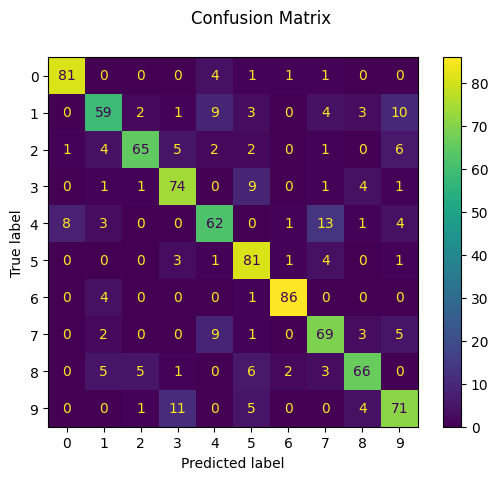

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()